# TP3
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en  
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

## Parte 1
Obtener una detección del logo en cada imagen sin falsos positivos

In [1]:
# Importamos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# cargamos imagenes
img_l1 = cv.imread('./images/coca_logo_1.png')
img_l2 = cv.imread('./images/coca_logo_2.png')
img_L = cv.imread('./images/COCA-COLA-LOGO.jpg')
img_multi = cv.imread('./images/coca_multi.png')
img_re1 = cv.imread('./images/coca_retro_1.png')
img_re2 = cv.imread('./images/coca_retro_2.png')
img_logo = cv.imread('./images/logo_1.png')

# pasamos a rgb
img_l1_rgb = cv.cvtColor(img_l1, cv.COLOR_BGR2RGB)
img_l2_rgb = cv.cvtColor(img_l2, cv.COLOR_BGR2RGB)
img_L_rgb = cv.cvtColor(img_L, cv.COLOR_BGR2RGB)
img_multi_rgb = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)
img_re1_rgb = cv.cvtColor(img_re1, cv.COLOR_BGR2RGB)
img_re2_rgb = cv.cvtColor(img_re2, cv.COLOR_BGR2RGB)
img_logo_rgb = cv.cvtColor(img_logo, cv.COLOR_BGR2RGB)

# pasamos a escala de grises
img_l1_gray = cv.cvtColor(img_l1, cv.COLOR_BGR2GRAY)
img_l2_gray = cv.cvtColor(img_l2, cv.COLOR_BGR2GRAY)
img_L_gray = cv.cvtColor(img_L, cv.COLOR_BGR2GRAY)
img_multi_gray = cv.cvtColor(img_multi, cv.COLOR_BGR2GRAY)
img_re1_gray = cv.cvtColor(img_re1, cv.COLOR_BGR2GRAY)
img_re2_gray = cv.cvtColor(img_re2, cv.COLOR_BGR2GRAY)
img_logo_gray = cv.cvtColor(img_logo, cv.COLOR_BGR2GRAY)

# cargamos template
template = cv.imread('./template/pattern.png',0)

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2707/1667039237.py:9: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


<function matplotlib.pyplot.show(close=None, block=None)>

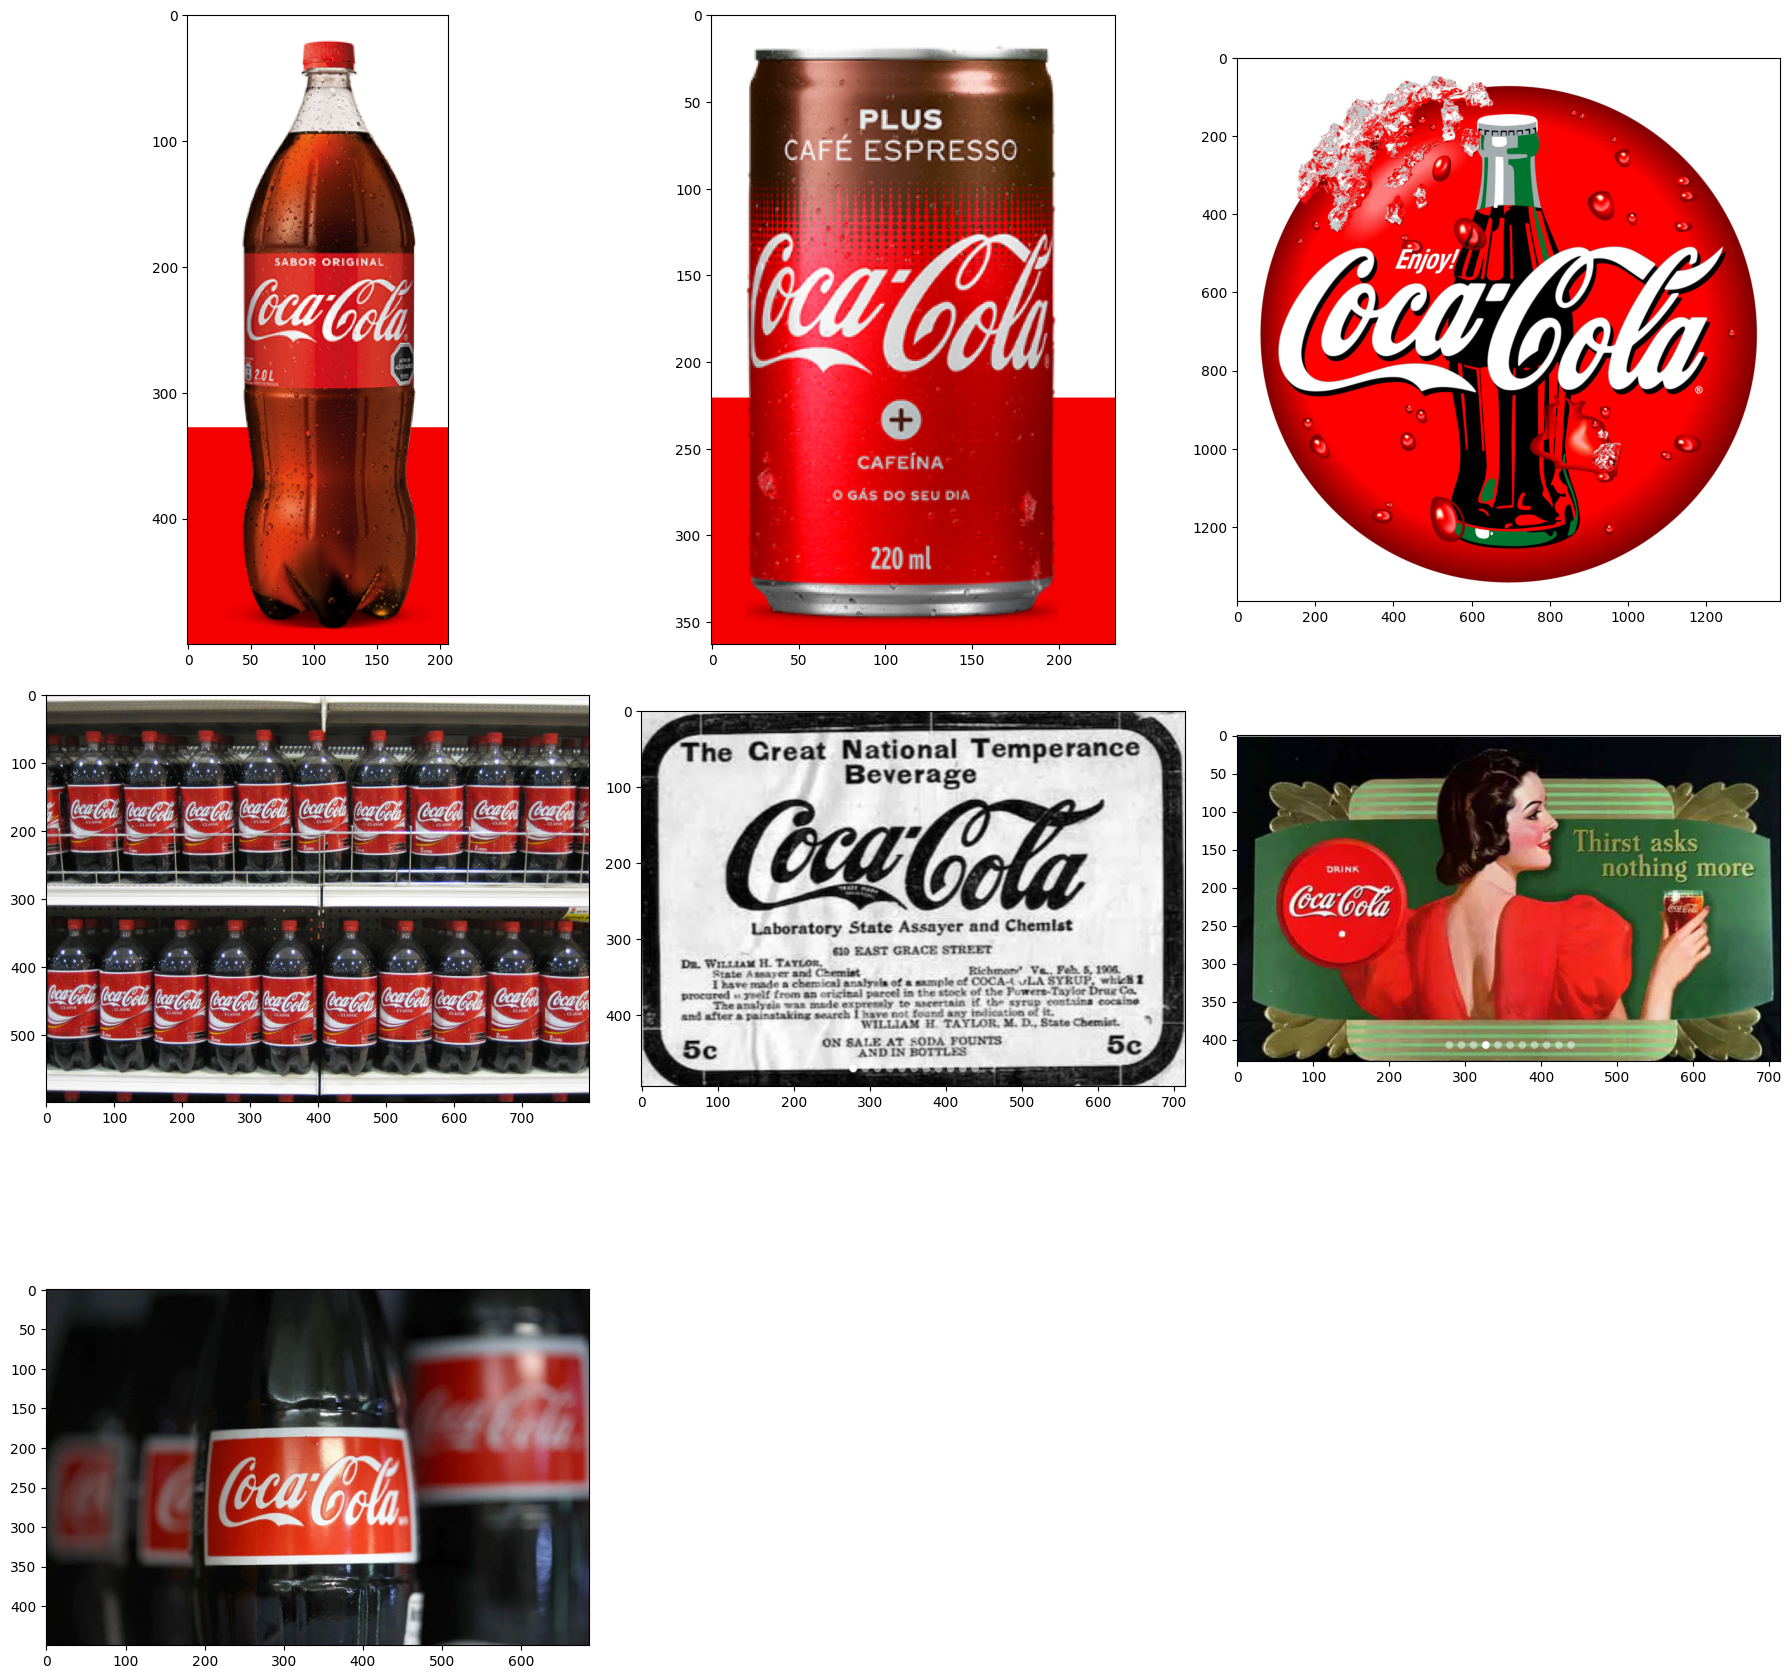

In [3]:
# imprimimos imagenes
images_list_rgb = [img_l1_rgb, img_l2_rgb, img_L_rgb,
               img_multi_rgb, img_re1_rgb, img_re2_rgb, 
               img_logo_rgb]
figure = plt.figure(figsize=(18,18))
for i in range(len(images_list_rgb)):
    figure.add_subplot(3, 3, i+1)
    plt.imshow(images_list_rgb[i])
    figure.tight_layout(pad=1)
plt.show

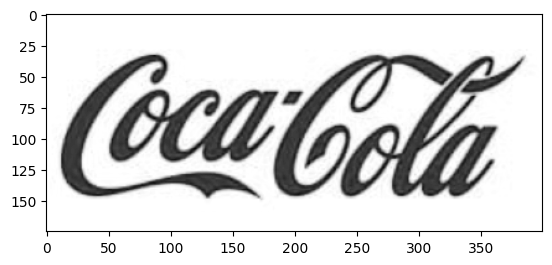

In [4]:
# mostramos template 
plt.imshow(template, cmap='gray')

**Observacion**

Como primera observacion el template para algunas imagenes mostradas anteriormente, queda muy chico o muy grande, es decir, dependiendo de la imagen podemos tener un problema con la escala.

In [5]:
w, h = template.shape[::-1]
print(f"Template -> Ancho: {w}, Altura: {h}")

Template -> Ancho: 400, Altura: 175


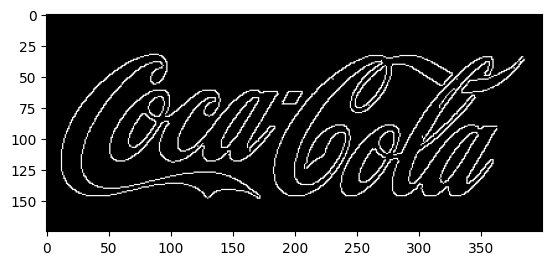

In [6]:
"""
Aplicamos canny para deteccion de bordes en la plantilla
para aumentar la efectividad de la deteccion.
"""
template_canny = cv.Canny(template, threshold1=50, threshold2=200)
plt.imshow(template_canny, cmap='gray')

In [7]:
# funcion para detectar logo
def logo_detector(img_gray, img_rgb, template, method):

    """
    Esta funcion detectara un objecto en una imagen
    basandose en template matching

    img_gray: imagen en escala de grises
    img_rgb: imagen en rgb
    template: template una vez se le halla aplicado Canny
    method: metodo para la comparacion
    """
    
    # tomamos dimensiones del template
    w_template, h_template = template.shape[::-1]

    ## ajustamos la escala de la imagen para que funcione el template match
    # Iteramos sobre 20 escalas de 4.0 -> 0.1
    scales = np.linspace(0.1, 4.0, 20)[::-1]

    # best_val nos dara el mejor valor de correlacion
    best_val = 0

    # best_match nos dara la mejor ubicacion y la escala
    best_match = 0

    for scale in scales:
        img_resize = cv.resize(img_gray, None, fx=scale, fy=scale)

        w_resize, h_resize = img_resize.shape[::-1]

        if w_resize < w_template or h_resize < h_template:
            print("WARNNING: Imagen más pequeña que el logo")
            print("INFO: se toma la escala anterior")
            break

        """
        Aplicamos canny para deteccion de bordes tambien en la imagen
        para aumentar la efectividad de la deteccion del logo.
        """
        img_edge = cv.Canny(img_resize, 50,200)

        # aplicamos template match -> sale mapa de calor
        tem_match = cv.matchTemplate(img_edge, template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tem_match)

        # Comparamos para encontrar el best_value donde la corr sea mayor
        if max_val > best_val:
            best_val = max_val
            best_match = (max_loc, scale) # tomamos la ubicacion y mejor escala 
                                          # donde se detecto el objeto

    # la ubicacion y mejor escala donde se detecto el objeto
    top_left, best_scale = best_match

    """
    creamos bordes del rectangulo para el logo detectado y
    escalamos la deteccion para la imagen original
    """
    top_left_scaled = (int(top_left[0] / best_scale), int(top_left[1] / best_scale))
    bottom_right = (int((top_left[0] + w_template)/ best_scale), int((top_left[1] + h_template) / best_scale))

    
    img_output = img_rgb.copy()
    # Dibujamos rectangulo
    cv.rectangle(img_output,top_left_scaled, bottom_right, color=(0,0,255),thickness=2)

    return img_output, best_scale, best_val

WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_2707/436044416.py:19: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


<function matplotlib.pyplot.show(close=None, block=None)>

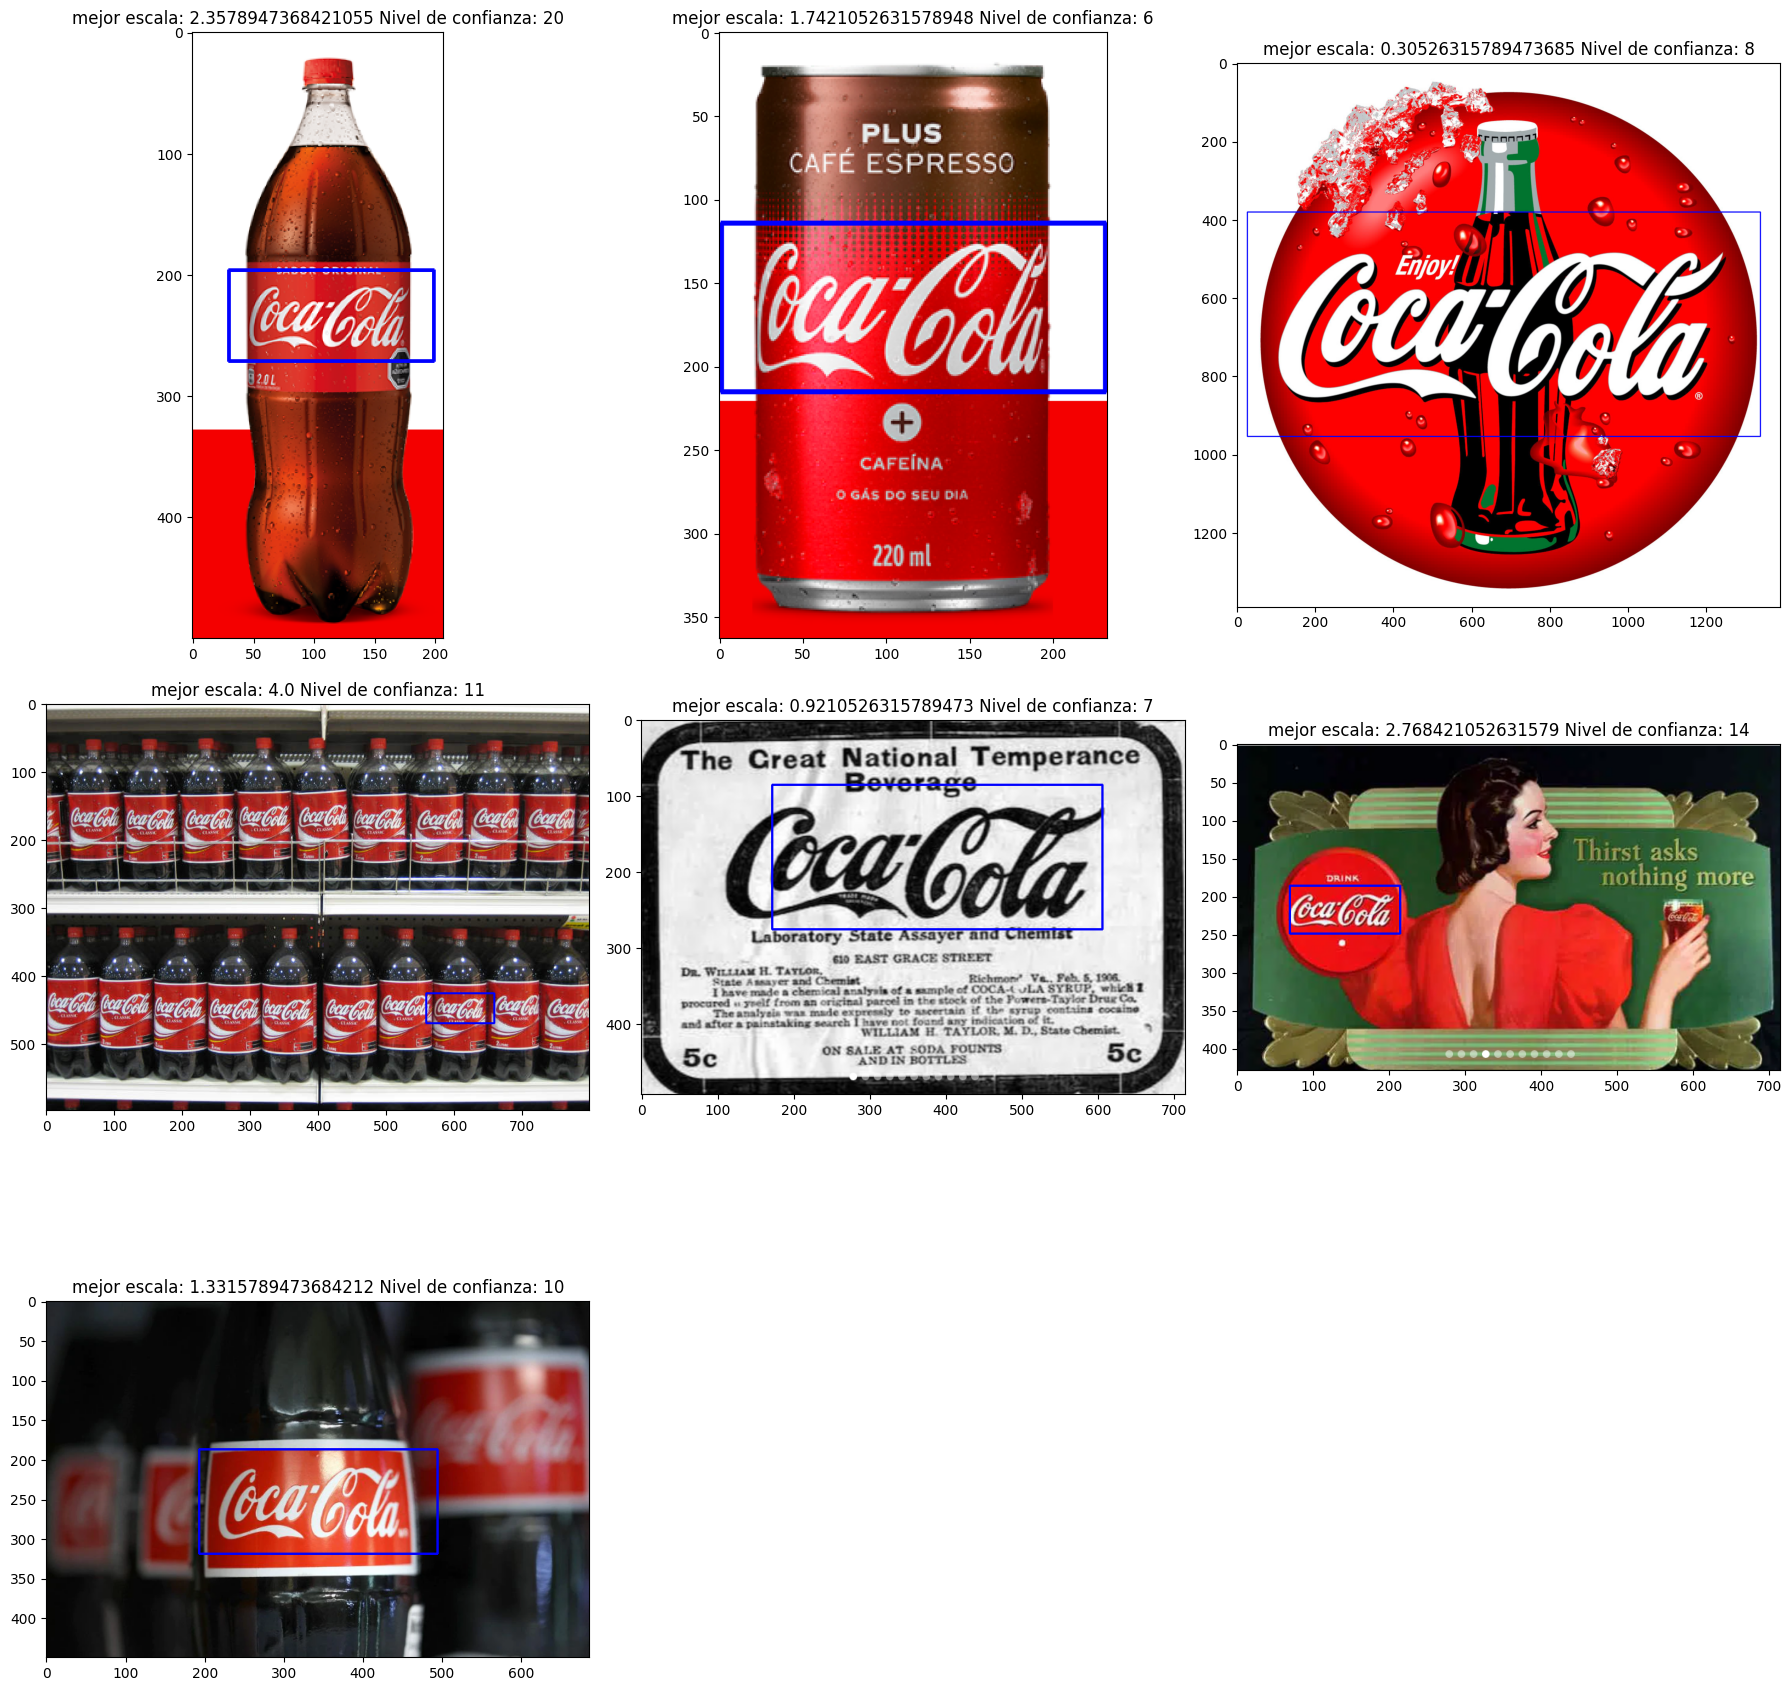

In [8]:
# escogemos la metrica de deteccion
method = eval('cv.TM_CCOEFF_NORMED')
# lista de imagenes en escala de grises
img_list_gray = [img_l1_gray, img_l2_gray, img_L_gray,
               img_multi_gray, img_re1_gray, img_re2_gray, 
               img_logo_gray]

images_list_rgb = [img_l1_rgb, img_l2_rgb, img_L_rgb,
               img_multi_rgb, img_re1_rgb, img_re2_rgb, 
               img_logo_rgb]

# llamamos funcion para detectar el logo
figure = plt.figure(figsize=(18,18))
for i in range(len(img_list_gray)):
    img_temMatch, b_scale, max_val = logo_detector(img_list_gray[i], images_list_rgb[i],template_canny, method)
    figure.add_subplot(3, 3, i+1)
    plt.imshow(img_temMatch)
    plt.title(f"mejor escala: {b_scale} Nivel de confianza: {int(max_val * 100)}")
    figure.tight_layout(pad=1)
plt.show

**Analisis**

De esta primera parte, se pudo observar una de las deventajas de template matching, donde las escalas de los logos varia con respecto al template. Sin embargo, una de las formas para arreglar estas diferencias de escala, es probando con distintos tamaños de la misma imagen contra el template original y posteriormente luego de encontrar la que más se ajuste a nuestro template, se guarda su ubicación y por ultimo se reescala para tomar la deteccion con la imagen original. 

Adicionalmente, para facilitar un poco más la deteccion se utilizo el algoritmo de Canny para extraer los bordes tanto del template como de la imagen y así evitamos problemas con los fondos y cambios de intesidad que puedan tener las imagenes. 

## Parte 2

Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

In [172]:
def tm_multi_obj(img_gray, img_rgb, template, method):

    w_template, h_template = template.shape[::-1]

    best_val = 0

    # resize image 
    scales = np.linspace(0.1, 4.0, 20)[::-1]
    for scale in scales:
        img_resize = cv.resize(img_gray, None, fx=scale, fy=scale)

        w_resize, h_resize = img_resize.shape[::-1]

        if w_resize < w_template or h_resize < h_template:
            print("WARNNING: Imagen más pequeña que el logo")
            print("INFO: se toma la escala anterior")
            break

        # detecting borders
        img_edge = cv.Canny(img_resize, 50,200)

        # multiple image deteccion
        tm = cv.matchTemplate(img_edge, template, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tm)

        # Comparamos para encontrar el best_value donde la corr sea mayor
        if max_val > best_val:
            best_val = max_val
            last_scale = scale
            save_img_size = img_resize
            save_tm = tm
    
    print(last_scale)
    #img_out = img_rgb.copy()
    img_out = save_img_size
    threshold = 0.07
    loc = np.where( save_tm >= threshold)
    for position in zip(*loc[::-1]):
        #top_left = position
        #botton_right = ((int(position[0] + w_template) / last_scale), int((position[1] + h_template) / last_scale))
        top_left = position
        botton_right = (position[0] + w_template, position[1] + h_template)
        cv.rectangle(img_out, top_left, botton_right, color=(255,0,0),thickness=2)

    return img_out

WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
4.0


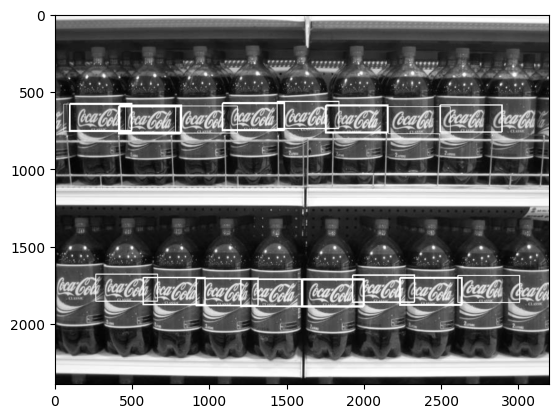

In [173]:
multi_detec = tm_multi_obj(img_multi_gray, img_multi_rgb, template_canny, method)
plt.imshow(multi_detec, cmap='gray')

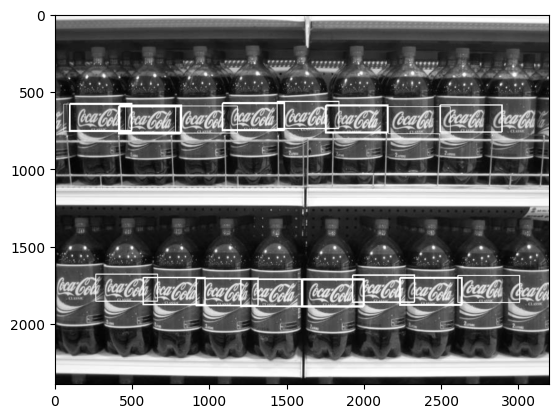

In [154]:
method_for_multi = eval('cv.TM_CCOEFF_NORMED')
w_template, h_template = template_canny.shape[::-1]

best_val = 0

# resize image 
img_resize = cv.resize(img_multi_gray, None, fx=4.0, fy=4.0)

w_resize, h_resize = img_resize.shape[::-1]

# detecting borders
img_edge = cv.Canny(img_resize, 50,200)

# multiple image deteccion
tm = cv.matchTemplate(img_edge, template_canny, method_for_multi)

#img_out = img_multi_rgb.copy()
img_out = img_resize.copy()
threshold = 0.07
loc = np.where( tm >= threshold)
for position in zip(*loc[::-1]):
    top_left = position
    botton_right = (position[0] + w_template, position[1] + h_template)
    cv.rectangle(img_out, top_left, botton_right, color=(255,0,0),thickness=2)

plt.imshow(img_out, cmap='gray')